In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [237]:
# 병원 - 영업상태명에서 휴업, 폐업인 병원 제거
# 좌표 x, y 가져와서 구글맵에 찍어
# 의원 - 상세영업상태명에서 영업중만 남기기
# 진료과목내용명에서 소아청소년과만 남기기
# 의원수 신경 안쓰기

In [238]:
# 시·군·구별_근로소득_연말정산_신고현황.csv

income = pd.read_csv('시·군·구별_근로소득_연말정산_신고현황.csv', encoding='UTF-8', skiprows=2)
income

,행정구역(시군구)별(1),행정구역(시군구)별(2),인원 (명),금액 (백만원),인원 (명).1,금액 (백만원).1,인원 (명).2,금액 (백만원).2,인원 (명).3,금액 (백만원).3
0,전국,소계,19959148,807198885,19907727,803208612,17857818,455957519,12919174,52698621
1,서울,소계,3952583,184858796,3944244,184066506,3537573,113851288,2565528,17333494
2,서울,강남구,215632,17477665,215441,17417230,197339,12781199,156295,2932330
3,서울,강동구,192080,8488374,191800,8449977,172314,5005361,126135,630369
4,서울,강북구,105489,3274497,105266,3259552,91807,1661978,61474,135266
...,...,...,...,...,...,...,...,...,...,...
242,경남,합천군,9838,317420,9816,316507,8846,162244,6086,11417
243,제주,소계,232571,7985643,232345,7951570,207655,4141826,142908,375971
244,제주,제주시,175810,6064037,175652,6039377,157106,3132000,107941,277434
245,제주,서귀포시,56761,1921607,56693,1912193,50549,1009826,34967,98537


In [239]:
# 행정구역(시군구)별(1), 행정구역(시군구)별(2), 급여 총계 인원(명), 급여 총계 금액(백만원)만 남기기
income = income.iloc[:, :4]
income.columns = ['시/도', '자치구', '인원(명)', '총 급여(백만원)']
income

,시/도,자치구,인원(명),총 급여(백만원)
0,전국,소계,19959148,807198885
1,서울,소계,3952583,184858796
2,서울,강남구,215632,17477665
3,서울,강동구,192080,8488374
4,서울,강북구,105489,3274497
...,...,...,...,...
242,경남,합천군,9838,317420
243,제주,소계,232571,7985643
244,제주,제주시,175810,6064037
245,제주,서귀포시,56761,1921607


In [240]:
# 시군구1에서 서울만 남기기
income = income.loc[(income['시/도'] == '서울') & (income['자치구'] != '소계')].reset_index(drop=True)
print(income['자치구'].unique().size)
income

25


,시/도,자치구,인원(명),총 급여(백만원)
0,서울,강남구,215632,17477665
1,서울,강동구,192080,8488374
2,서울,강북구,105489,3274497
3,서울,강서구,252396,9964209
4,서울,관악구,224352,7550177
5,서울,광진구,150149,6121949
6,서울,구로구,174004,6504808
7,서울,금천구,104225,3388533
8,서울,노원구,194250,7784253
9,서울,도봉구,118133,4009934


In [241]:
# 1인당 총 급여 구하기 (1년 총 급여)
income['1인당 총 급여'] = np.round(income['총 급여(백만원)'] * 1000000 / income['인원(명)'])
income

,시/도,자치구,인원(명),총 급여(백만원),1인당 총 급여
0,서울,강남구,215632,17477665,81053206.0
1,서울,강동구,192080,8488374,44191868.0
2,서울,강북구,105489,3274497,31041123.0
3,서울,강서구,252396,9964209,39478474.0
4,서울,관악구,224352,7550177,33653264.0
5,서울,광진구,150149,6121949,40772493.0
6,서울,구로구,174004,6504808,37383095.0
7,서울,금천구,104225,3388533,32511710.0
8,서울,노원구,194250,7784253,40073375.0
9,서울,도봉구,118133,4009934,33944232.0


In [242]:
# 소계 제외하고 1인당 총 급여 높은 순으로 정렬
income = income.sort_values(by='1인당 총 급여', ascending=False).reset_index(drop=True)
income

,시/도,자치구,인원(명),총 급여(백만원),1인당 총 급여
0,서울,강남구,215632,17477665,81053206.0
1,서울,서초구,169405,13638923,80510746.0
2,서울,용산구,96680,6747813,69795335.0
3,서울,송파구,288952,16095685,55703664.0
4,서울,성동구,118248,6207800,52498140.0
5,서울,종로구,54388,2840850,52233029.0
6,서울,마포구,160890,8245601,51249929.0
7,서울,중구,49447,2447593,49499323.0
8,서울,양천구,178304,8806702,49391500.0
9,서울,영등포구,180393,8559698,47450278.0


In [243]:
# 병원 데이터 전처리
hospital = pd.read_csv('[필수활용01]서울시_병원정보.csv', encoding='EUC-KR')

In [244]:
# 병원 데이터의 시군구명 구하기
print(hospital['도로명전체주소'].apply(lambda x:x.split(" ")[1]).unique())
print(len(set(hospital['도로명전체주소'].apply(lambda x:x.split(" ")[1]).unique()) - set(income['자치구'].unique())) == 0)

hospital['자치구'] = hospital['도로명전체주소'].apply(lambda x:x.split(" ")[1])

['강남구' '중구' '송파구' '중랑구' '영등포구' '서초구' '성동구' '구로구' '노원구' '광진구' '마포구' '강동구'
 '동대문구' '강북구' '관악구' '강서구' '도봉구' '양천구' '금천구' '성북구' '종로구' '서대문구' '은평구' '용산구'
 '동작구']
True


In [245]:
hospital['의료기관종별명'].value_counts()

의료기관종별명
병원                 324
요양병원(일반요양병원)       172
한방병원               112
치과병원               105
종합병원                58
요양병원(노인병원)           4
요양병원(정신병원)           2
요양병원(장애인의료재활시설)      1
Name: count, dtype: int64

In [246]:
# 영업중인 병원 정보만 남기기
hospital = hospital[hospital['상세영업상태명'] == '영업중']

In [247]:
# 자치구별로 병원 개수 구하기
hospital['자치구'].value_counts()

자치구
강남구     70
송파구     43
강서구     38
강동구     34
영등포구    31
동대문구    31
서초구     29
은평구     24
구로구     22
도봉구     21
노원구     21
중랑구     20
관악구     20
양천구     18
성북구     18
강북구     17
서대문구    16
마포구     14
금천구     14
광진구     13
동작구     13
종로구     11
중구      11
성동구     10
용산구      3
Name: count, dtype: int64

In [248]:
# 요양 병원 제외했을 때
hospital[hospital['의료기관종별명'].str.contains('요양병원') == False]['자치구'].value_counts()

자치구
강남구     62
송파구     33
강서구     33
강동구     28
동대문구    25
서초구     25
영등포구    19
은평구     18
관악구     17
중랑구     17
양천구     15
노원구     15
구로구     14
도봉구     14
강북구     12
광진구     11
중구      11
마포구     11
서대문구    11
동작구     10
금천구     10
종로구     10
성북구     10
성동구      7
용산구      3
Name: count, dtype: int64

In [249]:
# 소득 데이터와 병원 개수 데이터 합치기
count_by_area = income[['자치구', '1인당 총 급여']].join(hospital['자치구'].value_counts(), on='자치구', how='left').rename(columns={'count':'병원 수'})
count_by_area

,자치구,1인당 총 급여,병원 수
0,강남구,81053206.0,70
1,서초구,80510746.0,29
2,용산구,69795335.0,3
3,송파구,55703664.0,43
4,성동구,52498140.0,10
5,종로구,52233029.0,11
6,마포구,51249929.0,14
7,중구,49499323.0,11
8,양천구,49391500.0,18
9,영등포구,47450278.0,31


# 

In [250]:
# 의원 데이터 전처리
clinic = pd.read_csv('[필수활용02]서울시_의원정보.csv', encoding='cp949')

In [251]:
# 의원 데이터의 시군구명 구하기


# 주소가 이상하게 표기되어 있는 데이터 제거 
print(clinic[~clinic['도로명전체주소'].apply(lambda x:x.split(" ")[1]).isin(income['자치구'].unique())]['도로명전체주소'].values)
clinic = clinic[clinic['도로명전체주소'].apply(lambda x:x.split(" ")[1]).isin(income['자치구'].unique())]
print(clinic['도로명전체주소'].apply(lambda x:x.split(" ")[1]).unique())
print(len(set(clinic['도로명전체주소'].apply(lambda x:x.split(" ")[1]).unique()) - set(income['자치구'].unique())) == 0)

clinic['자치구'] = clinic['도로명전체주소'].apply(lambda x:x.split(" ")[1])

['서울특별시 연희로 242' '서울특별시 새말로 101 (형수빌딩 6층)'
 '서울특별시 진관3로 70, 204호 (은평뉴타운구파발아파트)' '서울특별시 가산디지털1로 186, 403,416호'
 '서울특별시 선릉로63길 13' '서울특별시  곰달래로 192' '서울특별시 공항대로 329, 3층 (등촌동)'
 '서울특별시  노해로 507, 7층, 8층' '서울특별시 서초중앙로 253' '서울특별시  증가로 129, 2층'
 '서울특별시  율곡로 204']
['구로구' '중랑구' '양천구' '중구' '송파구' '서초구' '용산구' '은평구' '영등포구' '종로구' '성동구' '동대문구'
 '강남구' '금천구' '강동구' '관악구' '강북구' '도봉구' '강서구' '광진구' '동작구' '마포구' '서대문구' '노원구'
 '성북구']
True


In [252]:
# 영업중인 의원 정보만 남기기
clinic = clinic[clinic['상세영업상태명'] == '영업중']

In [253]:
clinic['의료기관종별명'].value_counts()

의료기관종별명
의원      9459
치과의원    4882
한의원     3626
보건소       24
보건지소      12
조산원        3
Name: count, dtype: int64

In [254]:
# 자치구별로 의원 개수 구하기
clinic['자치구'].value_counts()

자치구
강남구     2744
서초구     1337
송파구     1202
강서구      889
강동구      834
영등포구     756
마포구      751
노원구      737
관악구      697
은평구      683
양천구      649
동작구      583
동대문구     579
구로구      577
광진구      555
중구       548
중랑구      533
성북구      527
종로구      467
성동구      461
강북구      448
서대문구     420
도봉구      357
금천구      348
용산구      324
Name: count, dtype: int64

In [255]:
# 소득 데이터와 의원 개수 데이터 합치기
count_by_area = count_by_area.join(clinic['자치구'].value_counts(), on='자치구', how='left').rename(columns={'count':'의원 수'})
count_by_area


,자치구,1인당 총 급여,병원 수,의원 수
0,강남구,81053206.0,70,2744
1,서초구,80510746.0,29,1337
2,용산구,69795335.0,3,324
3,송파구,55703664.0,43,1202
4,성동구,52498140.0,10,461
5,종로구,52233029.0,11,467
6,마포구,51249929.0,14,751
7,중구,49499323.0,11,548
8,양천구,49391500.0,18,649
9,영등포구,47450278.0,31,756


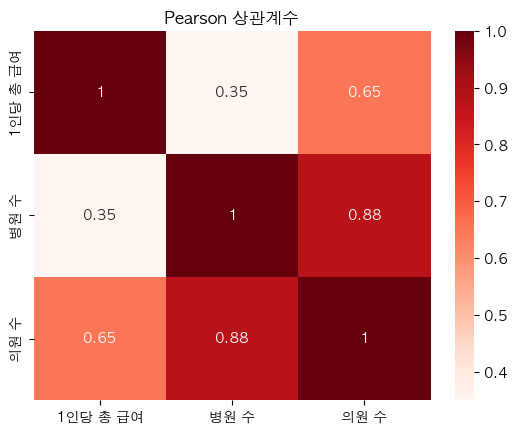

In [290]:
# 가설: 지역의 경제 수준이 높으면 병원의 수가 많을 것이다.
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
sns.heatmap(count_by_area.corr(numeric_only=True, method='pearson'), annot=True, cmap='Reds')
plt.title('Pearson 상관계수')
plt.show()

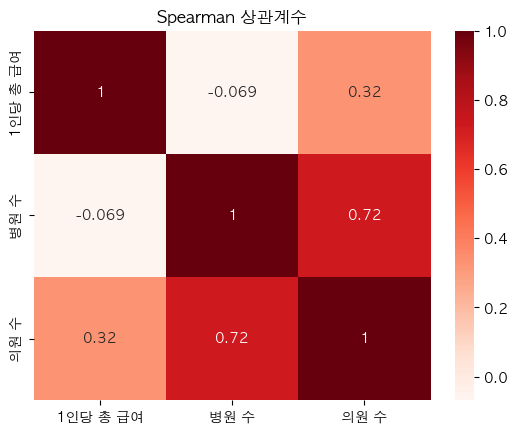

In [291]:
sns.heatmap(count_by_area.corr(numeric_only=True, method='spearman'), annot=True, cmap='Reds')
plt.title('Spearman 상관계수')
plt.show()

In [262]:
count_by_area.describe()

,1인당 총 급여,병원 수,의원 수
count,2.500000e+01,25.000000,25.000000
mean,4.644391e+07,22.480000,720.240000
std,1.359716e+07,13.684298,486.089779
min,3.104112e+07,3.000000,324.000000
25%,3.738310e+07,14.000000,467.000000
50%,4.418890e+07,20.000000,579.000000
75%,5.124993e+07,29.000000,751.000000
max,8.105321e+07,70.000000,2744.000000


In [268]:
np.round(count_by_area['1인당 총 급여'].values / 1000000)

array([81., 81., 70., 56., 52., 52., 51., 49., 49., 47., 45., 44., 44.,
       42., 41., 40., 39., 38., 37., 37., 34., 34., 33., 33., 31.])

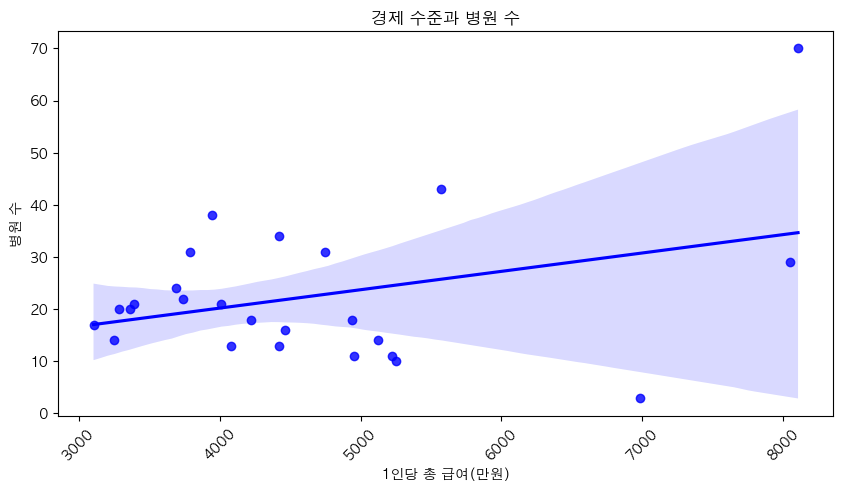

In [299]:
plt.figure(figsize=(10, 5))
sns.regplot(data=count_by_area, x=np.round(count_by_area['1인당 총 급여'] / 10000, 0), y='병원 수', color='blue')
plt.xticks(rotation=45)
plt.xlabel('1인당 총 급여(만원)')
plt.title('경제 수준과 병원 수')



plt.show()

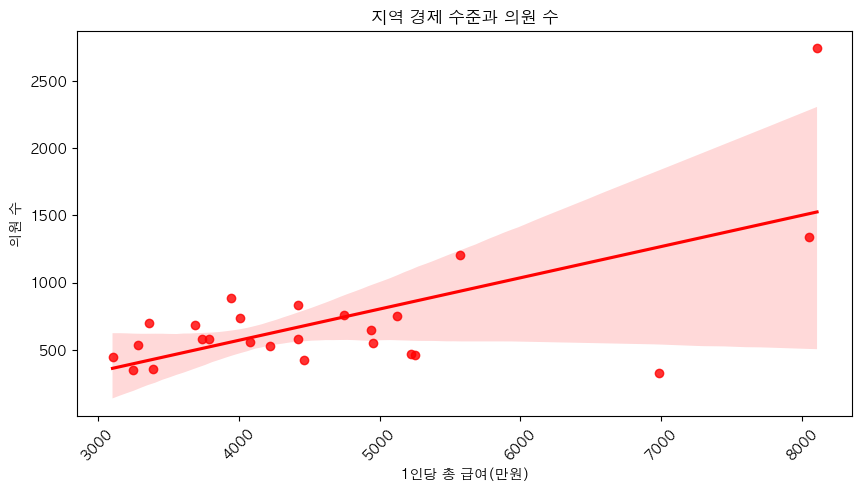

In [298]:
plt.figure(figsize=(10, 5))
sns.regplot(data=count_by_area, x=np.round(count_by_area['1인당 총 급여'] / 10000, 0), y='의원 수', color='red')
plt.xticks(rotation=45)
plt.xlabel('1인당 총 급여(만원)')
plt.title('지역 경제 수준과 의원 수')
plt.show()

In [301]:
hospital

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,구급차특수,구급차일반,총인원,구조사수,허가병상수,최초지정일자,시도,도로명시도,소재지시도,자치구
211,2770,병원,01_01_01_P,3060000,PHMA219833060034021200004,1983-08-22,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,중랑구
212,2771,병원,01_01_01_P,3060000,PHMA219843060034021200004,1984-04-03,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,중랑구
213,2772,병원,01_01_01_P,3060000,PHMA220023060034021200020,2002-10-25,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,중랑구
214,2773,병원,01_01_01_P,3060000,PHMA220033060034021200027,1900-01-01,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,중랑구
215,2774,병원,01_01_01_P,3060000,PHMA220073060034021200015,2007-03-22,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,중랑구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,6826,병원,01_01_01_P,3150000,PHMA220223150037021200002,2022-04-28,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,강서구
769,6829,병원,01_01_01_P,3070000,PHMA220223070034021200002,2022-06-27,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,성북구
770,6832,병원,01_01_01_P,3000000,PHMA220223000034021200001,2022-04-27,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,종로구
771,6836,병원,01_01_01_P,3080000,PHMA220223080033021200001,2022-04-08,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,강북구


In [306]:
hospital

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,구급차특수,구급차일반,총인원,구조사수,허가병상수,최초지정일자,시도,도로명시도,소재지시도,자치구
211,2770,병원,01_01_01_P,3060000,PHMA219833060034021200004,1983-08-22,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,중랑구
212,2771,병원,01_01_01_P,3060000,PHMA219843060034021200004,1984-04-03,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,중랑구
213,2772,병원,01_01_01_P,3060000,PHMA220023060034021200020,2002-10-25,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,중랑구
214,2773,병원,01_01_01_P,3060000,PHMA220033060034021200027,1900-01-01,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN,중랑구
215,2774,병원,01_01_01_P,3060000,PHMA220073060034021200015,2007-03-22,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,중랑구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,6826,병원,01_01_01_P,3150000,PHMA220223150037021200002,2022-04-28,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,강서구
769,6829,병원,01_01_01_P,3070000,PHMA220223070034021200002,2022-06-27,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,성북구
770,6832,병원,01_01_01_P,3000000,PHMA220223000034021200001,2022-04-27,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,종로구
771,6836,병원,01_01_01_P,3080000,PHMA220223080033021200001,2022-04-08,NaN,1,영업/정상,13,...,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시,강북구
